<a id="top"></a>

<div style="
  background: linear-gradient(135deg, #007BFF, #00C6FF);
  color: white;
  text-align: center;
  padding: 25px 10px;
  font-family: 'Segoe UI', 'Roboto', sans-serif;
  border-radius: 15px;
  box-shadow: 0 4px 10px rgba(0,0,0,0.2);
  margin-bottom: 25px;
">
  <h1 style="margin: 0; font-size: 36px; letter-spacing: 1px;">
    📧 Email Spam Classification
  </h1>
  <p style="margin-top: 8px; font-size: 16px; opacity: 0.9;">
    A Machine Learning project to classify emails as Spam or Ham
  </p>
</div>

<div style="text-align: center; margin-bottom: 30px;">
  <img src="https://miro.medium.com/v2/resize:fit:900/format:webp/0*mbFBPcPUJD-53v3h.png"
       alt="Spam Detection Banner"
       style="width: 80%; max-width: 600px; border-radius: 12px; box-shadow: 0 3px 10px rgba(0,0,0,0.15);">
</div>


### **Problem Statement**

The primary goal of this notebook is to develop a predictive model that accurately classifies incoming Email messages as either ham or spam. We will use the Spam Mails Dataset, which consists of 4993 messages tagged with their respective labels. </span>

In [2]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

Using Colab cache for faster access to the 'spam-mails-dataset' dataset.


In [11]:
df = pd.read_csv("/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv")

In [12]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [14]:
df['text'] = df['text'].apply(lambda x : x.replace('\r\n', ' '))

In [17]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to b...,0


In [19]:
#check duplicate values
print(df.duplicated().sum())

0


In [20]:
df.shape

(5171, 4)

In [21]:
df.drop(columns = ['Unnamed: 0', 'label'], inplace = True)

In [23]:
  # Rename the columns name
df.rename(columns = {'label_num': 'target'}, inplace = True)

In [24]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291 thi...,0
1,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs this deal is to b...,0


### **EDA**

In [25]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 71.01140978534133
percentage of 1 : 28.98859021465867


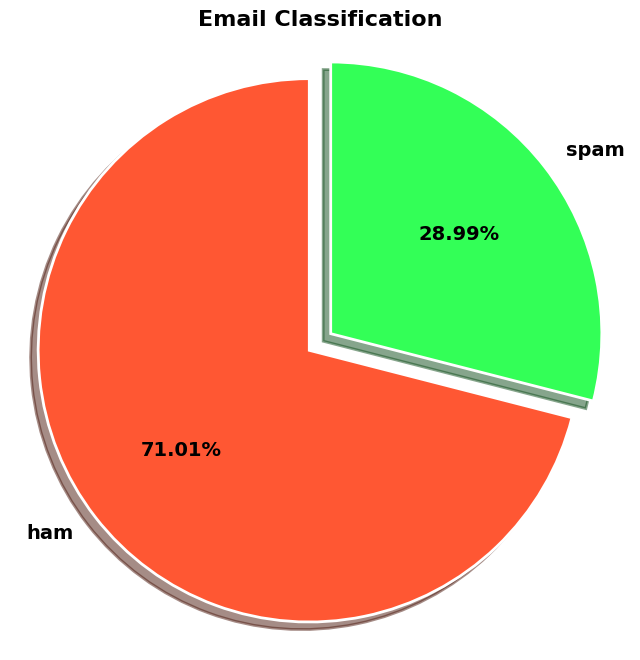

In [26]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


Text Length and Structure Analysis

In [29]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5171.00000,5171.000000,5171.000000
mean,1029.74531,229.181009,13.121253
std,1505.10317,336.487397,27.541637
min,10.00000,2.000000,1.000000
25%,238.00000,52.000000,4.000000
50%,529.00000,122.000000,7.000000
75%,1214.00000,283.500000,15.000000
max,31860.00000,8863.000000,1204.000000


Summary Statistics for Legitimate Emails

In [31]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,3672.000000,3672.000000,3672.000000
mean,959.392974,226.239107,11.440904
std,1360.494244,332.179661,24.892442
min,17.000000,3.000000,1.000000
25%,227.000000,51.000000,3.000000
50%,517.500000,124.000000,6.000000
75%,1208.000000,294.000000,13.000000
max,31860.000000,8863.000000,1204.000000


Summary Statistics for Spam Email

In [32]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1499.000000,1499.000000,1499.000000
mean,1202.082722,236.387592,17.237492
std,1800.139488,346.821249,32.796043
min,10.000000,2.000000,1.000000
25%,274.000000,55.000000,4.000000
50%,563.000000,116.000000,9.000000
75%,1236.500000,244.000000,18.500000
max,21749.000000,3963.000000,693.000000


Character Length Distribution for Legitimate and Spam Messages

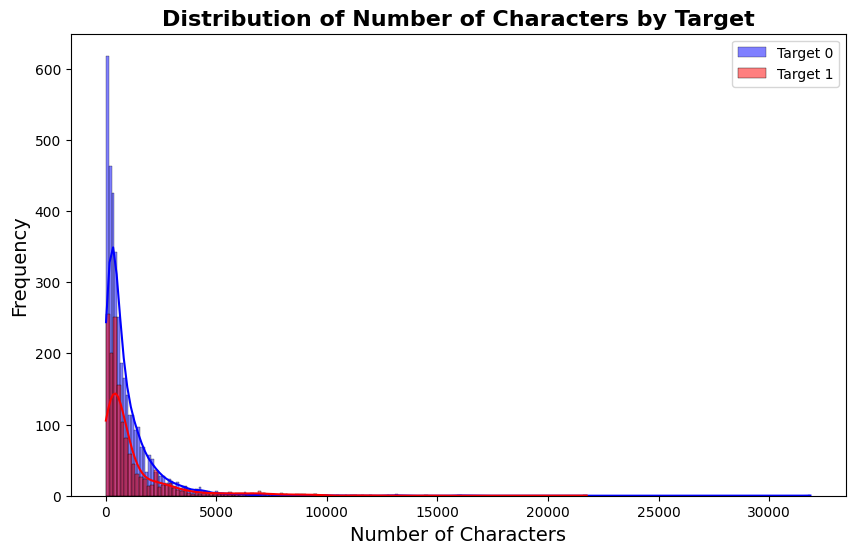

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


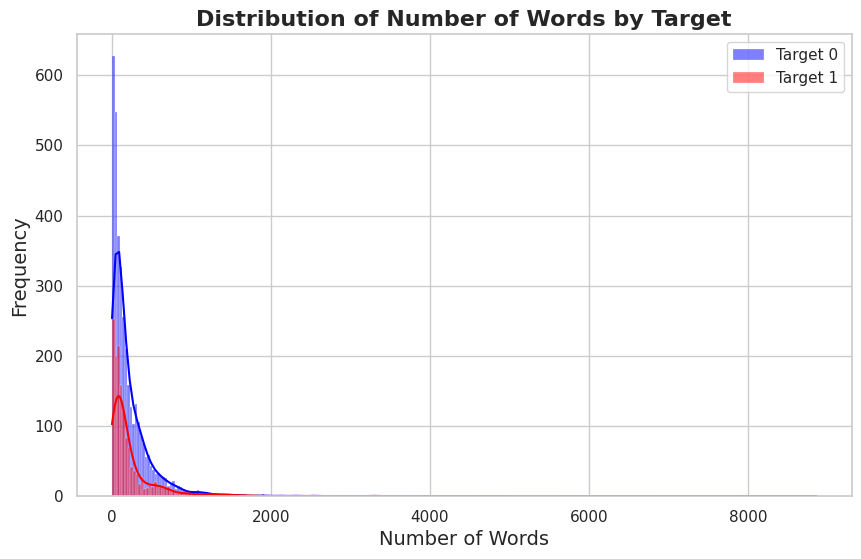

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


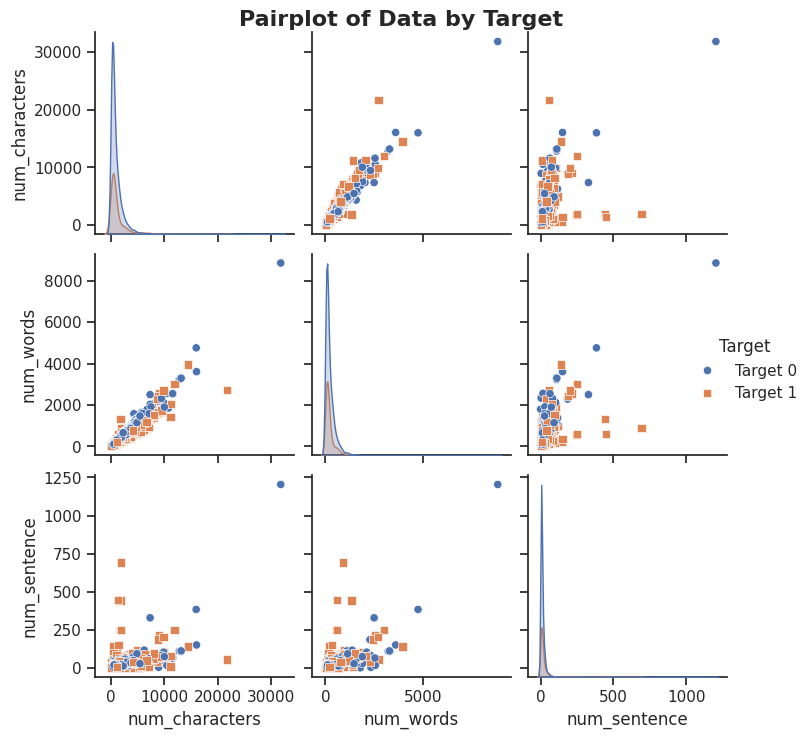

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()


In [36]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.073165,0.013685,0.095500
num_characters,0.073165,1.000000,0.970123,0.631120
num_words,0.013685,0.970123,1.000000,0.704043
num_sentence,0.095500,0.631120,0.704043,1.000000


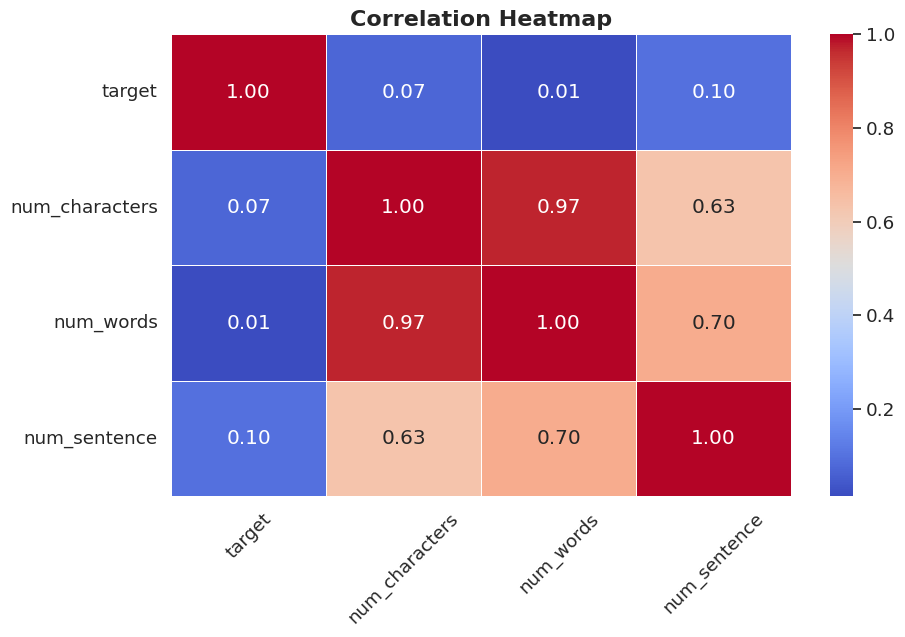

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


### Data Preprocessing

In [38]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)


In [39]:
transform_text('get a carzy deal... win an iphone')

'get carzi deal win iphon'

Creating a New Column: 'transformed_text'

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

Word Cloud for Spam Emails

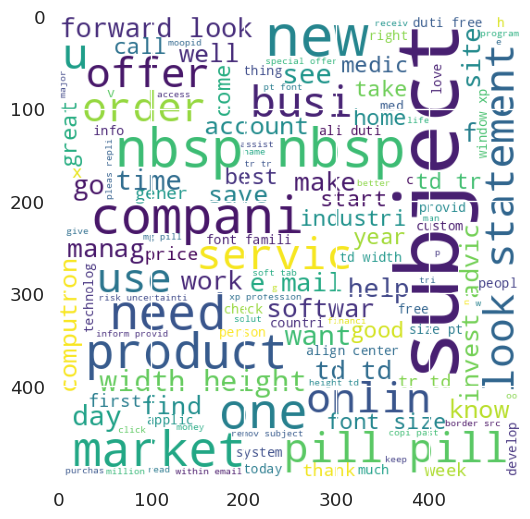

In [41]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

Word Cloud for Not Spam Emails

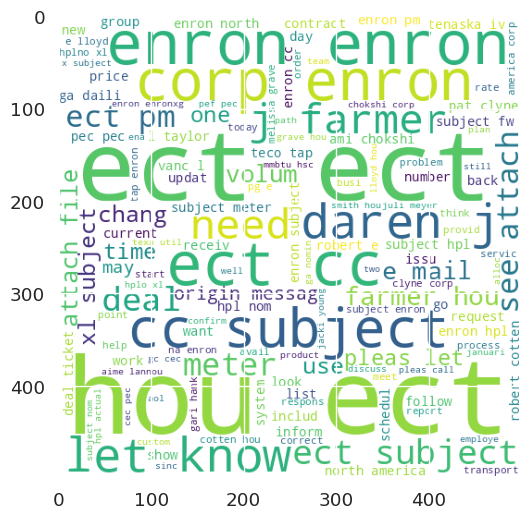

In [42]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

###Model Building

Initializing CountVectorizer and TfidfVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

Dependent and Independent Variable

In [44]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

 Split into Train and Test Data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)




In [48]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

In [49]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [50]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9816425120772947
Precision:  0.956081081081081

For:  KNN
Accuracy:  0.9739130434782609
Precision:  0.9678571428571429

For:  NB
Accuracy:  0.9458937198067633
Precision:  0.8652037617554859

For:  DT
Accuracy:  0.8415458937198068
Precision:  0.6463700234192038

For:  LR
Accuracy:  0.970048309178744
Precision:  0.93

For:  RF
Accuracy:  0.9777777777777777
Precision:  0.9403973509933775

For:  Adaboost
Accuracy:  0.9265700483091788
Precision:  0.8198198198198198

For:  Bgc
Accuracy:  0.9565217391304348
Precision:  0.9039735099337748

For:  ETC
Accuracy:  0.9845410628019323
Precision:  0.9627118644067797

For:  GBDT
Accuracy:  0.9410628019323671
Precision:  0.9042553191489362

For:  xgb
Accuracy:  0.9710144927536232
Precision:  0.9245901639344263


In [51]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))